# Dataset Exploration

## Setup
Importing relevant packages and loading in the data

In [1]:
import numpy as np
import h5py as h5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with h5.File('../qlk_jetexp_nn_training_database_minimal.h5', "r") as f:
    inputs = f['input']['block0_values'][()]
    input_names = f['input']['block0_items'][()]
    index_inp = f['input']['axis1'][()]   #row number from 0 to len(inputs)

    outputs = f['output']['block0_values'][()]
    output_names = f['output']['block0_items'][()]
    index_out = f['output']['axis1'][()]   #row number from 0 to len(inputs) with some missing rows

In [3]:
df_in = pd.DataFrame(inputs, index_inp, input_names)
df_out = pd.DataFrame(outputs, index_out, output_names)

## Missing Outputs
Not all inputs correspond to an output, here we find the percentage of inputs without and look at the distribution of missing values

In [4]:
print(f'First 100 input indices: \n {index_inp[:100]}')
print(f'First 100 input indices: \n {index_out[:100]}')
index_diff = np.setdiff1d(index_inp, index_out) # find indices in input but not output data
print(f'Number of inputs: {len(index_inp)}')
print(f'Number of outputs: {len(index_out)}')
print(f'Percentage of inputs with an output: {100*len(index_out) / len(index_inp):.2f}%')

First 100 input indices: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
First 100 input indices: 
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103]
Number of inputs: 33394950
Number of outputs: 22090805
Percentage of inputs with an output: 66.15%


/home/jbarr/.conda/envs/UKAEA/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


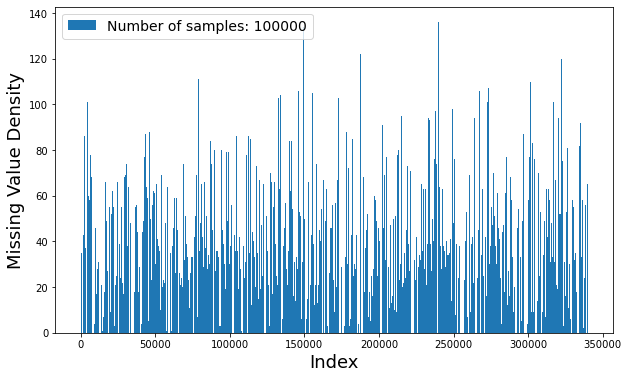

In [6]:
plt.figure(figsize = (10,6))
num_samples = 100_000
plt.hist(index_diff[:num_samples], bins = 250, label = f'Number of samples: {num_samples}');
plt.xlabel('Index', fontsize = 18)
plt.ylabel('Missing Value Density', fontsize = 18);
plt.legend(fontsize = 14);

## Distributions
Print a sample of the input and output data and look at their distributions

### Input Data

In [6]:
df_in.head(10)

,b'Ane',b'Ate',b'Autor',b'Machtor',b'x',b'Zeff',b'gammaE',b'q',b'smag',b'alpha',b'Ani1',b'Ati0',b'normni1',b'Ti_Te0',b'logNustar'
0,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,-2.386978,0.032854,1.0,-1.200474
1,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,-0.750587,0.032854,1.0,-1.200474
2,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,0.885805,0.032854,1.0,-1.200474
3,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,2.522196,0.032854,1.0,-1.200474
4,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,4.158588,0.032854,1.0,-1.200474
5,2.236213,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,-2.386978,0.032854,1.0,-1.200474
6,2.236213,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,-0.750587,0.032854,1.0,-1.200474
7,2.236213,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,0.885805,0.032854,1.0,-1.200474
8,2.236213,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,2.522196,0.032854,1.0,-1.200474
9,2.236213,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,4.158588,0.032854,1.0,-1.200474


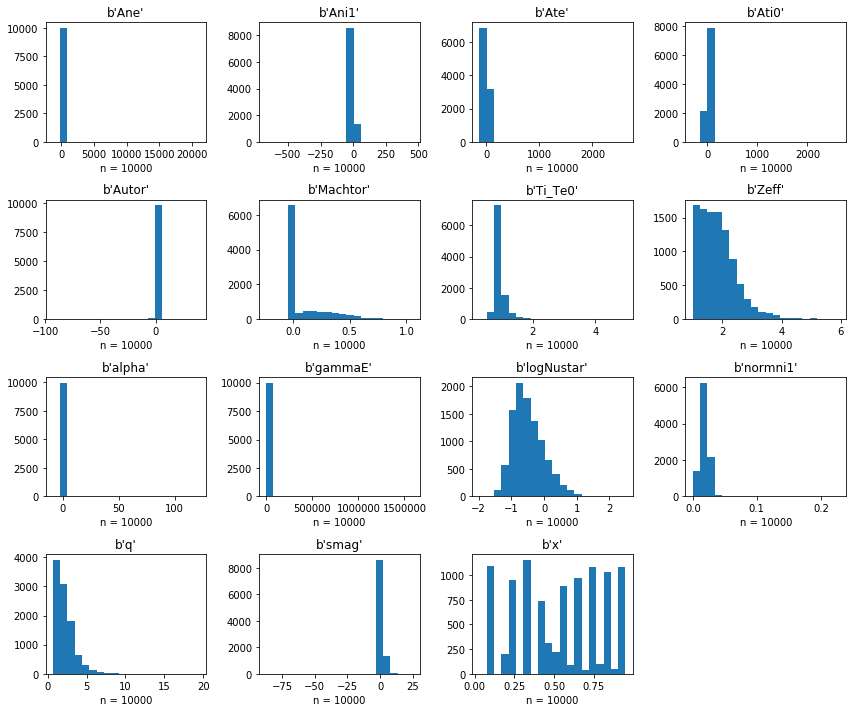

In [7]:
hist_vals = df_in.sample(num_samples).hist(figsize = (12,10), bins = 20, grid = False);

for ax in hist_vals.flatten():
    ax.set_xlabel(f'n = {num_samples}');
    
plt.tight_layout();

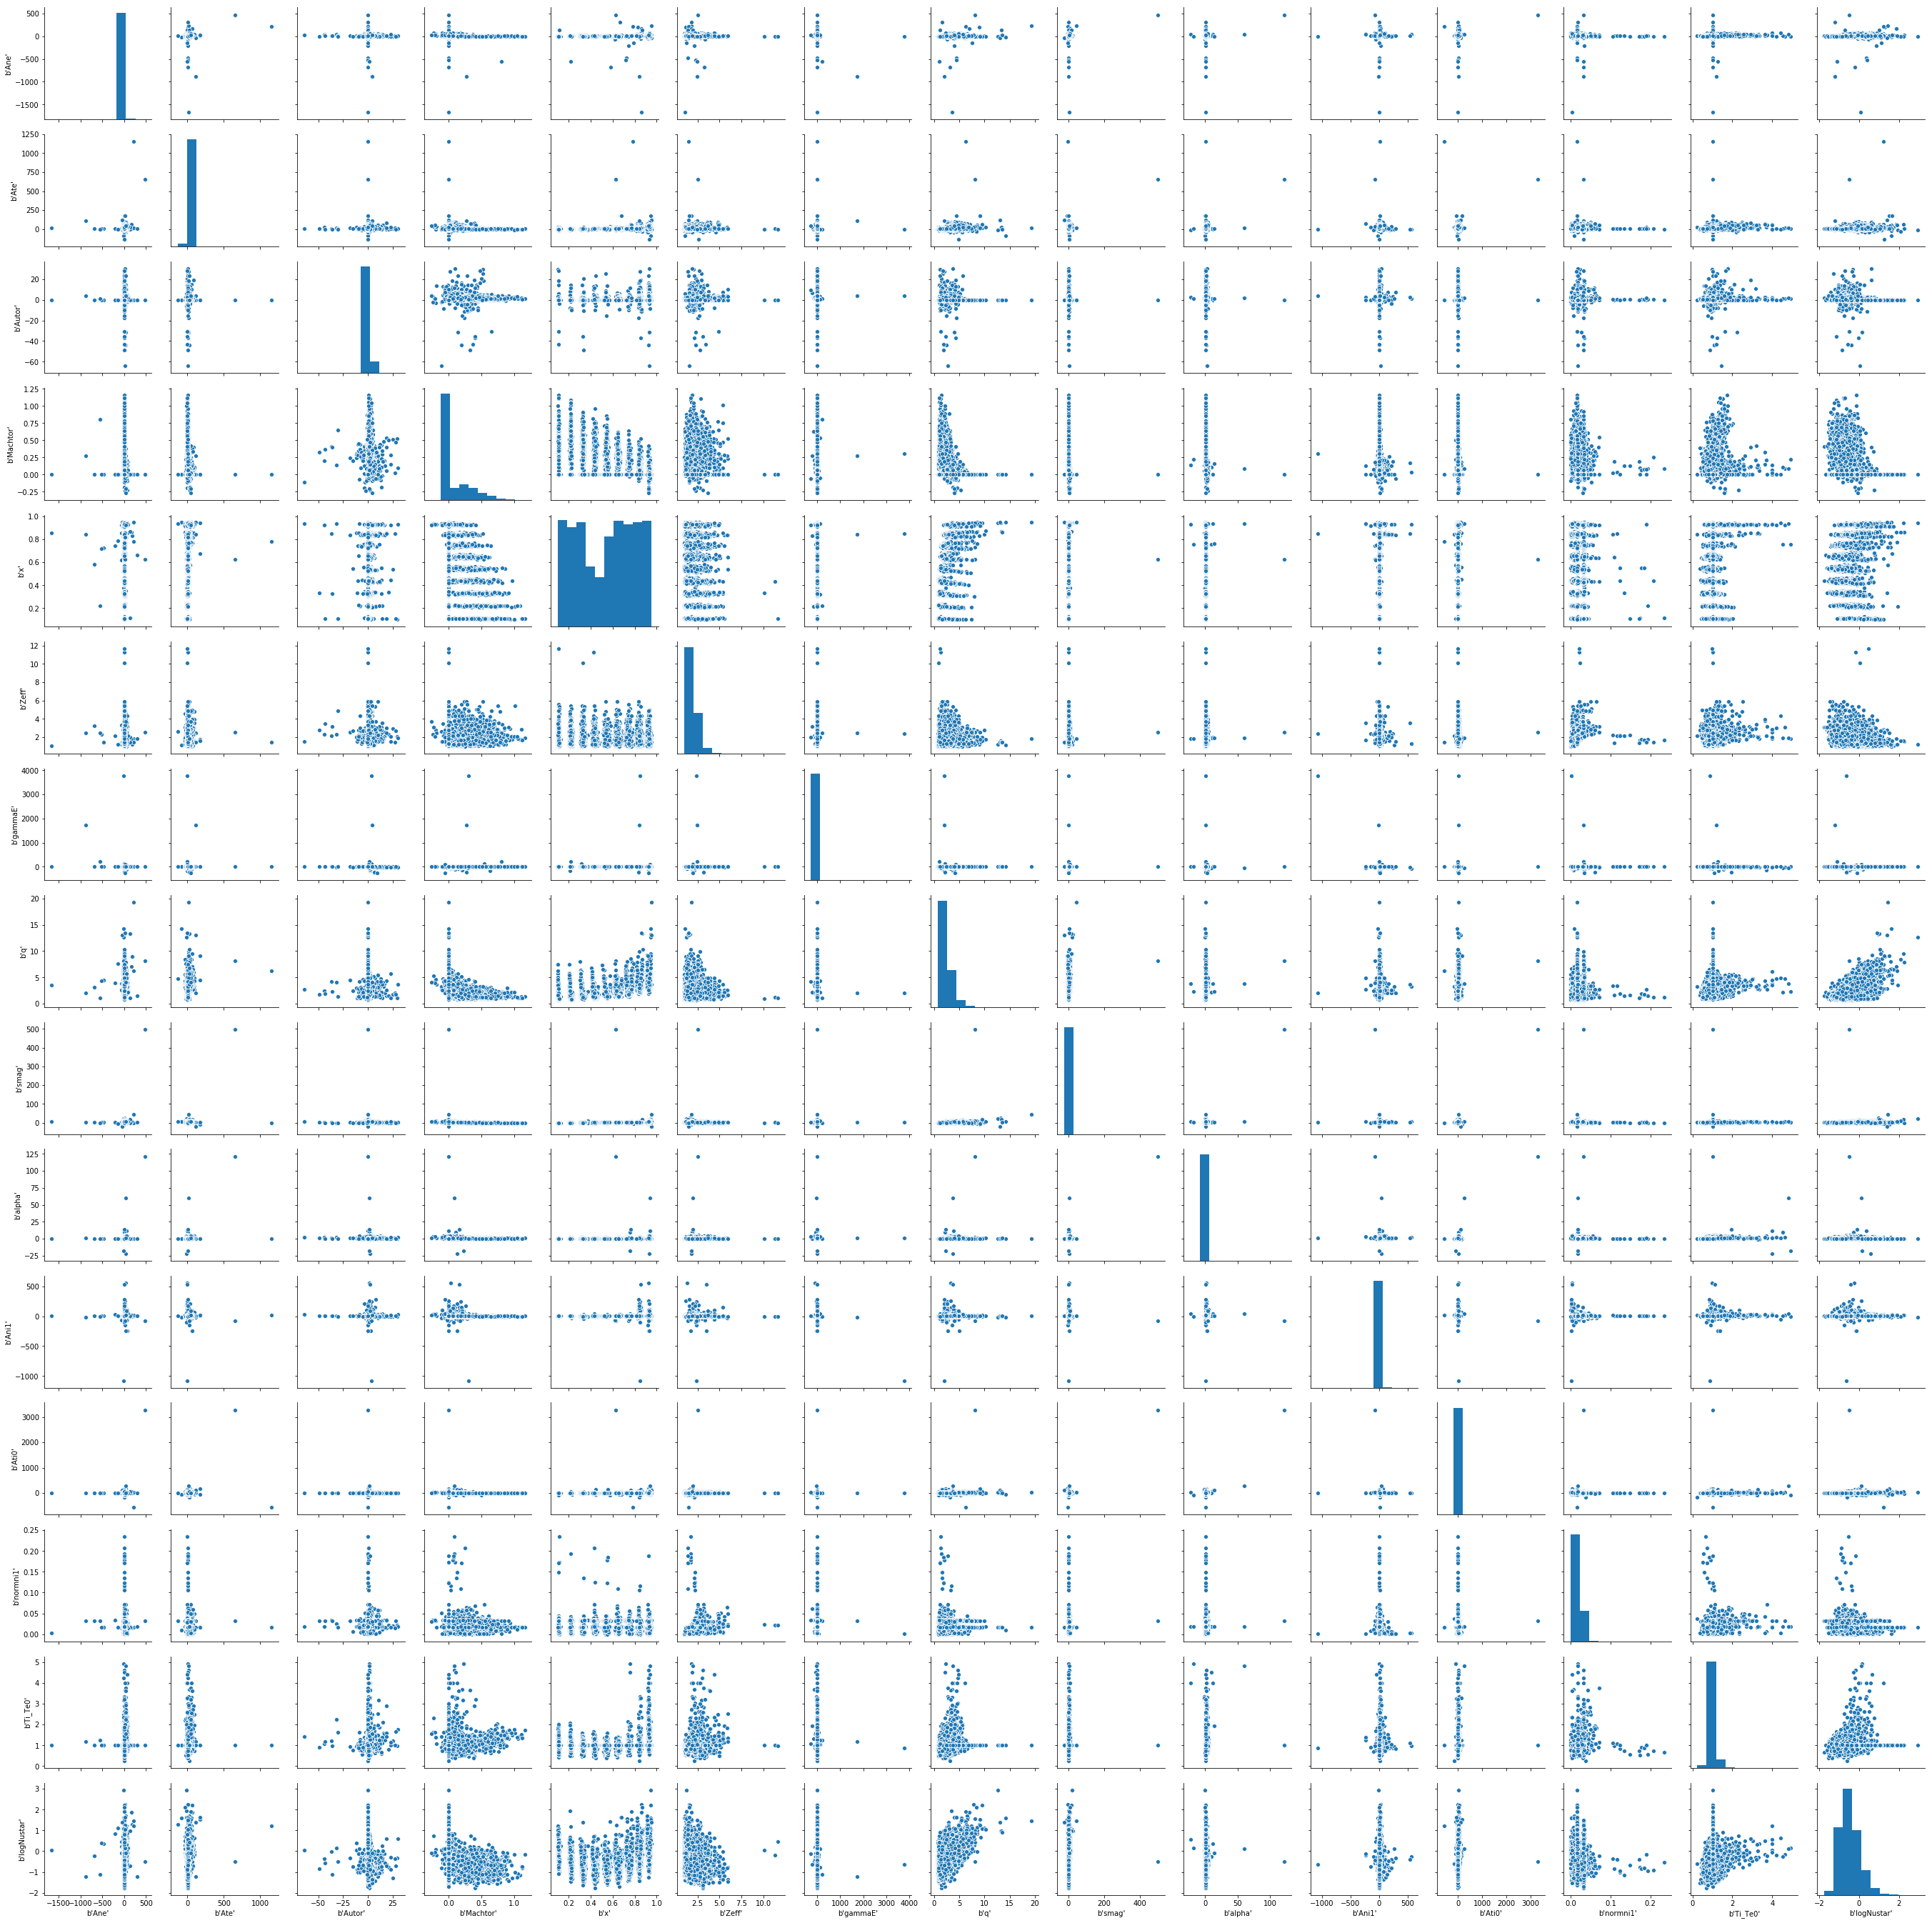

In [8]:
sns.pairplot(df_in.sample(num_samples));

### Output Data

In [9]:
df_out.head(20)

,b'R0',b'efeETG_GB',b'efeTEM_GB',b'efiITG_GB',b'efeITG_GB_div_efiITG_GB',b'eflITG_GB_div_efiITG_GB',b'efhITG_GB_div_efiITG_GB',b'pfeITG_GB_div_efiITG_GB',b'pfiITG_GB_div_efiITG_GB',b'pflITG_GB_div_efiITG_GB',...,b'dfhTEM_GB_div_efeTEM_GB',b'vceTEM_GB_div_efeTEM_GB',b'vciTEM_GB_div_efeTEM_GB',b'vclTEM_GB_div_efeTEM_GB',b'vchTEM_GB_div_efeTEM_GB',b'vtlTEM_GB_div_efeTEM_GB',b'vthTEM_GB_div_efeTEM_GB',b'vriTEM_GB_div_efeTEM_GB',b'vrlTEM_GB_div_efeTEM_GB',b'vrhTEM_GB_div_efeTEM_GB'
0,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.903508,0.0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution of output values, where the xlabel gives the number of sampled values and the actual number of non-NaN values for that particular column.

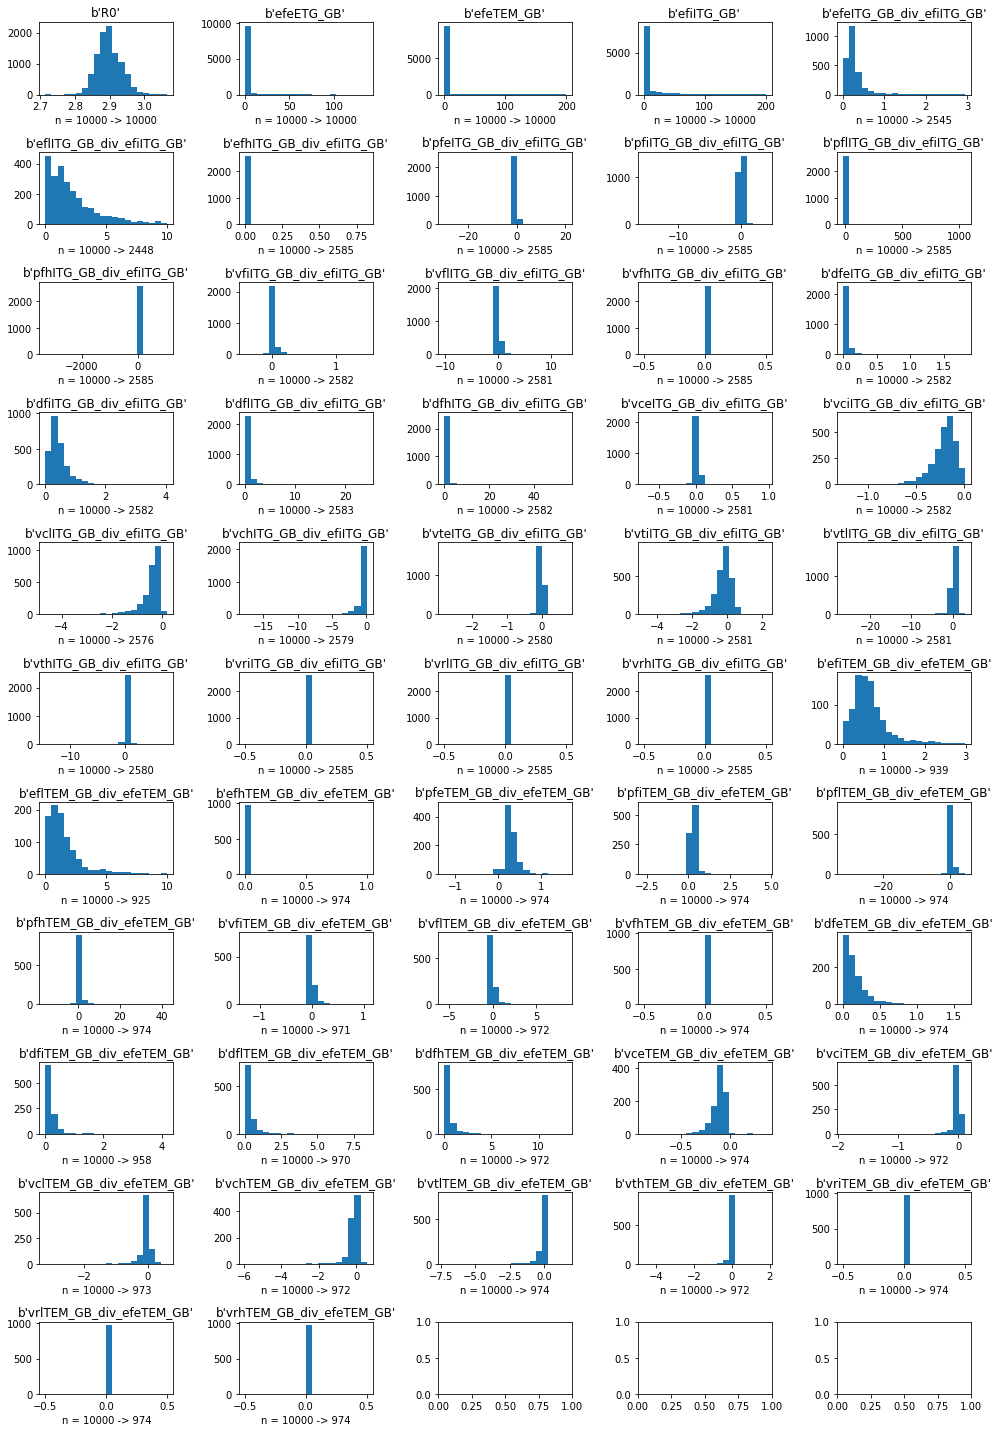

In [10]:
fig, axes = plt.subplots(nrows = 11, ncols = 5, figsize = (14,20))
 
df_out_sample = df_out.sample(num_samples)
for ax, column, name in zip(axes.flatten(), df_out_sample, df_out.columns):
    dropped = df_out_sample[column].dropna()
    ax.hist(dropped, bins = 20)
    ax.set(title = name, xlabel = f'n = {num_samples} -> {len(dropped)}')
    
plt.tight_layout();

Similar to above but now also remove the number of values that are zero.

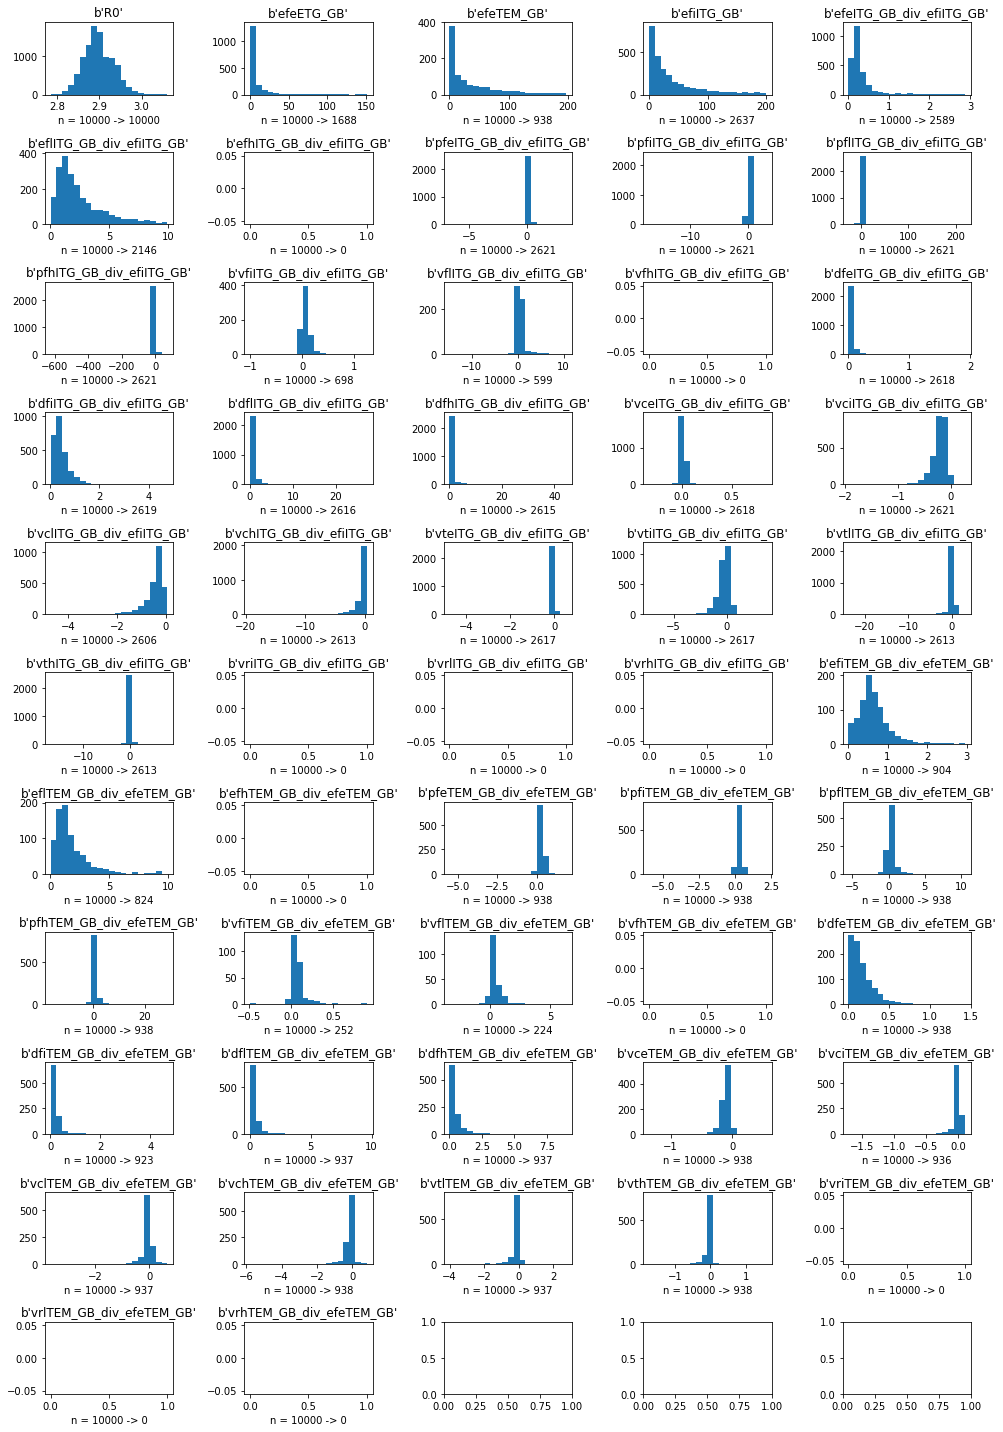

In [11]:
fig, axes = plt.subplots(nrows = 11, ncols = 5, figsize = (14,20))
 
df_out_sample = df_out.sample(num_samples)
for ax, column, name in zip(axes.flatten(), df_out_sample, df_out.columns):
    dropped = df_out_sample[column].dropna()
    dropped = dropped[dropped != 0]
    ax.hist(dropped, bins = 20)
    ax.set(title = name, xlabel = f'n = {num_samples} -> {len(dropped)}')
    
plt.tight_layout();

In [12]:
print("Percentage of values that are NaN in each column:")
df_out.sample(num_samples).isna().sum().apply(lambda x: 100 * x / num_samples)

Percentage of values that are NaN in each column:


b'R0'                          0.00
b'efeETG_GB'                   0.00
b'efeTEM_GB'                   0.00
b'efiITG_GB'                   0.00
b'efeITG_GB_div_efiITG_GB'    73.69
b'eflITG_GB_div_efiITG_GB'    74.55
b'efhITG_GB_div_efiITG_GB'    73.05
b'pfeITG_GB_div_efiITG_GB'    73.05
b'pfiITG_GB_div_efiITG_GB'    73.05
b'pflITG_GB_div_efiITG_GB'    73.05
b'pfhITG_GB_div_efiITG_GB'    73.05
b'vfiITG_GB_div_efiITG_GB'    73.07
b'vflITG_GB_div_efiITG_GB'    73.10
b'vfhITG_GB_div_efiITG_GB'    73.05
b'dfeITG_GB_div_efiITG_GB'    73.13
b'dfiITG_GB_div_efiITG_GB'    73.11
b'dflITG_GB_div_efiITG_GB'    73.10
b'dfhITG_GB_div_efiITG_GB'    73.10
b'vceITG_GB_div_efiITG_GB'    73.08
b'vciITG_GB_div_efiITG_GB'    73.08
b'vclITG_GB_div_efiITG_GB'    73.21
b'vchITG_GB_div_efiITG_GB'    73.14
b'vteITG_GB_div_efiITG_GB'    73.12
b'vtiITG_GB_div_efiITG_GB'    73.09
b'vtlITG_GB_div_efiITG_GB'    73.13
b'vthITG_GB_div_efiITG_GB'    73.12
b'vriITG_GB_div_efiITG_GB'    73.05
b'vrlITG_GB_div_efiITG_GB'  

We can also look at the histogram of the number of NaN columns in each row of the output and the also the reverse, the number of NaN rows for each column of the output.

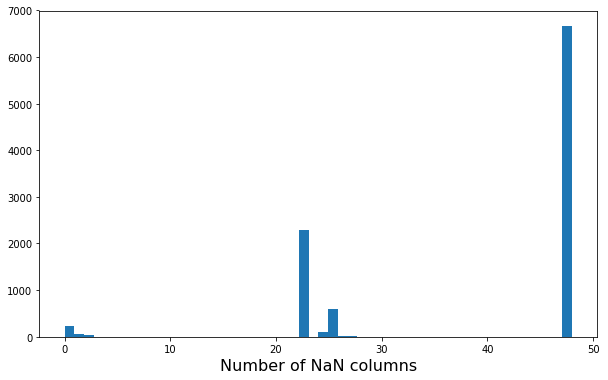

In [13]:
# count number of nan values in each row
df_out.sample(num_samples).count(axis = 1).apply(lambda x: 52 - x).hist(bins = 52, grid = False, figsize = (10,6))
plt.xlabel("Number of NaN columns", fontsize = 16);

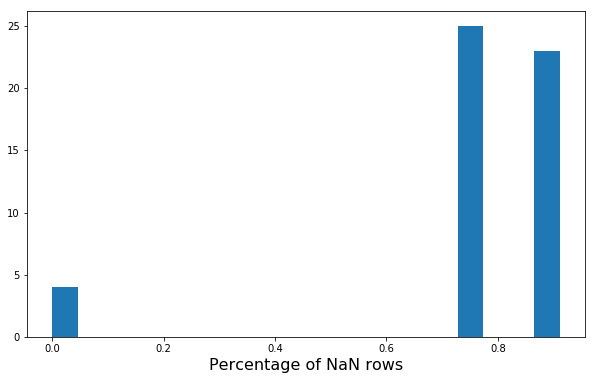

In [14]:
# count number of nan values in each column
count = df_out.sample(num_samples).count(axis = 0).apply(lambda x: (num_samples - x) / num_samples).hist(
        bins = 20, grid = False, figsize = (10,6))

plt.xlabel("Percentage of NaN rows", fontsize = 16);

## Further Analysis

It was noticed in the `df_out.head` that only a single row had a non-zero `efeTEM_GB` which also was the only row with non-NaN values  in some of the other columns. It is therefore worth checking if this is a trend across the entire dataset.

In [15]:
non_zero = df_out.loc[df_out[b'efeTEM_GB'] != 0]
print(f'Percentage of output values with non-zero efeTEM_GB: {100*len(non_zero)/ len(index_out): .2f}%')

Percentage of output values with non-zero efeTEM_GB:  9.29%


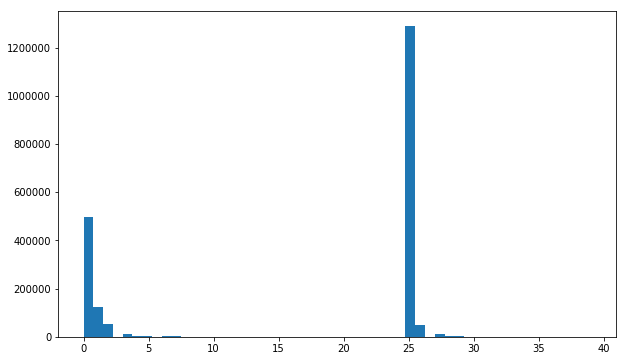

In [16]:
non_zero.count(axis = 1).apply(lambda x: 52 - x).hist(bins = 52, grid = False, figsize = (10,6));

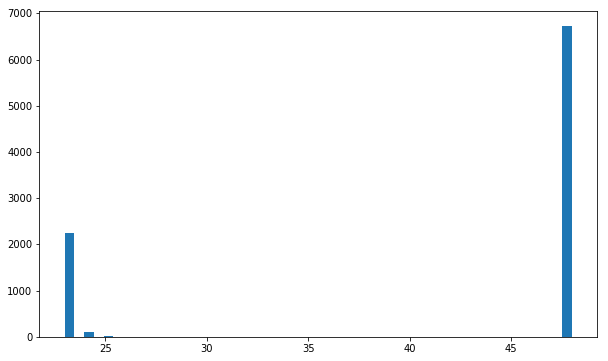

In [17]:
zero = df_out.sample(num_samples).loc[df_out[b'efeTEM_GB'] == 0]
zero.count(axis = 1).apply(lambda x: 52 - x).hist(bins = 52, grid = False, figsize = (10,6));